# CNNs in TensorFlow with Keras

In [28]:
import tensorflow as tf
if int(tf.__version__.split(".")[0]) < 2:
    !pip install tensorflow --upgrade
else:
    print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.0.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time

## Quick Recap - Machine Learning

- Identifying a relationship between the `input_features` and the `target`.
- Relationship in mathematical terms can be understood as a function.

For example:

`y = 2x-1`  
or 

`f(x) = 2x-1`  
Now, lets try and model it first using our machine learning model.

## Creating a machine learning model with keras.

We will create a model with one neuron and will feed 1 feature to it i.e. x, to predict y.

<center>
<img src="dl-teach-imgs/ml_model.png" height="400" width="400" />
</center>

In [3]:
# Machine Learning Regression Model with Keras
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

After defining the layer, we have to compile the model with appropriate optimizer and loss.

## Compiling Model, requires two important things, `loss` and `optimizer`.

### What is Loss?

A mathematical way of measuring how wrong your predictions are.


### How do we minimize loss?
By updating weights.

During the training process, we tweak and change the parameters (weights) of our model to try and minimize the `loss`, and make our predictions as correct as possible. But how exactly do you do that? How do you change the parameters of your model, by how much, and when?

**Your features has weights associated with them**. So, when you're updating the weights of our model by taking the derivative of them with respect to loss function, it roughly translates to this:

<img src='http://chrisjmccormick.files.wordpress.com/2014/02/gradientdescentupdate.png' />

Where, `theta` is the weight parameter.

This is the update process.

This is where `optimizers` come in. They tie together the loss function and model parameters by updating the model in response to the output of the loss function. In simpler terms, optimizers shape and mold your model into its most accurate possible form by futzing with the weights. The loss function is the guide to the terrain, telling the optimizer when it’s moving in the right or wrong direction.


<img src='https://miro.medium.com/max/1600/0*00BrbBeDrFOjocpK.' height='600' width='600' />


### Now, what does optimizer do?


Well, as the name suggests it optimizes the descent, or in simpler terms, optimizes the steps in the path down the hill towards our minima.

There are several optimizers based on Gradient Descent which does this. Below is the example of RMSProp.

<img src='dl-teach-imgs/optimizer.png' />



In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

### Creating our dataset

The below dataset has `y=2x-1` relationship. But our model does not know this relationship, and we are going to train it with the data so it can identify this pattern on its own.

In [5]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

### Training the model

In [6]:
model.fit(xs, ys, epochs=10, verbose = 2)

Train on 6 samples
Epoch 1/10
6/6 - 0s - loss: 6.1638 - accuracy: 0.1667
Epoch 2/10
6/6 - 0s - loss: 5.0335 - accuracy: 0.1667
Epoch 3/10
6/6 - 0s - loss: 4.1404 - accuracy: 0.1667
Epoch 4/10
6/6 - 0s - loss: 3.4341 - accuracy: 0.1667
Epoch 5/10
6/6 - 0s - loss: 2.8748 - accuracy: 0.1667
Epoch 6/10
6/6 - 0s - loss: 2.4311 - accuracy: 0.1667
Epoch 7/10
6/6 - 0s - loss: 2.0787 - accuracy: 0.1667
Epoch 8/10
6/6 - 0s - loss: 1.7979 - accuracy: 0.1667
Epoch 9/10
6/6 - 0s - loss: 1.5737 - accuracy: 0.1667
Epoch 10/10
6/6 - 0s - loss: 1.3941 - accuracy: 0.1667


### Let's predict the weight for our height

In [7]:
print(model.predict([10.0]))

[[13.559509]]


### Let's train again with `500 epochs` to improve prediction

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])
model.fit(xs, ys, epochs=500, verbose = 0)

In [9]:
print(model.predict([10.0]))

[[18.98619]]


Well, its almost `19`, based on the pattern `y=2x-1`.

## Let's now try a Deep Neural Network with 2 hidden layers

#### BTW, how deep is actually deep?
It can be as much as you want it, from `100 layers` to `1000 layers`.

But to clarify, when we say 100 layers deep, we mean that 100 hidden layers are present between input and output layer of the model.

### Problem statement

Build a **Neural Network** that predicts the price of a house according to a simple formula.

Formula is:

`house price = 50k base price + 50k per bedroom`

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=3),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### Visual representation of the neural network architecture above
<img src='dl-teach-imgs/model_2.png' height='300' width='300' />

In [11]:
model.fit(xs, ys, epochs=500, verbose=0)

In [12]:
print(model.predict([7.0]))

[[4.000046]]


## Solving Hand written Digit Recognition problem with CNNs

### Loading dataset

In [13]:
mnist = tf.keras.datasets.mnist

In [14]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print("Size of train data:",len(x_train))
print("Size of test data:",len(x_test))

Size of train data: 60000
Size of test data: 10000


In [16]:
x_train.shape

(60000, 28, 28)

### Lets visualize what the dataset is having

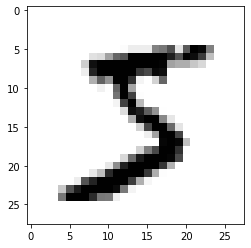

Label: 5


In [17]:
plt.imshow(x_train[0].reshape(28, 28),cmap = plt.cm.binary)
plt.show()
print("Label: {}".format(y_train[0]))

#### Now lets see what one example row of this dataset looks like

In [18]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


### Normalize 
As you can see, there are a lot of zeros and then there are very big numbers such as 135 and 132 because the pixel intensity is from 0 to 255. Now we want to normalize this dataset. For this we'll use keras' normalize method stored in `keras.utils.normalize()`

In [19]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

# **Convolutional Neural Network - CNN**

## Meaning
#### The name `Convolutional` comes from the word `convolve` which means `roll` or `slide`


## How does a computer sees an image?

####  An image can be represented as 3D Matrix or a 3 layers deep nested array, having `height`, `width` and `channels - (RGB)` 


<img src='https://miro.medium.com/max/1100/1*15yDvGKV47a0nkf5qLKOOQ.png' />


## Then how does Convolutional Neural work?

<center>
<img src='https://miro.medium.com/max/1836/1*TwMfGALfE0naUC8pLOK4Vg.jpeg' height='600' width='600' />
</center>

----------------

<center>
<img src='dl-teach-imgs/rgb_conv.png' height='600' width='600' />
</center>

----------------

<center>
<img src='dl-teach-imgs/multiple_features.png' height='600' width='600' />
</center>

----------------
## **Formula to calculate the output of a convolutional layer**
<center>
<img src='https://miro.medium.com/max/660/1*D47ER7IArwPv69k3O_1nqQ.png'>
</center>

-----------

## **Strides in CNN**
#### Stride of 1 means it slides to next from left to right without jumps.
#### Stride of 2 means it will move leave one block while moving from left to right.

#### Example of Stride 1 is given below

<center>
<img src='https://miro.medium.com/max/2560/1*ciDgQEjViWLnCbmX-EeSrA.gif'>
</center>

-----------


## Pooling

There are two types of pooling - 
1. **Average Pooling** - Takes average of the elements in filter during convolving.
2. **Max Pooling** - Takes the maximum value in the filter during convolving.

#**Intuitive example of Max-Pooling is shown below**

<center>
<img src='https://miro.medium.com/max/678/1*tpqURdMORniAGj2LnbmwVA.png'>
</center>

-----------
## **How does a Convolutional Neural Network look**

<center>
<img src='https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>
</center>


### Creating Model

Now that we have normalized our data, we will create our model. Read more about keras model [here](https://keras.io/getting-started/sequential-model-guide/).

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

## Architecture of Above network is as below
<center>
<img src='dl-teach-imgs/ConvNet_1.png' />
</center>

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [23]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_split= 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 33s 603us/sample - loss: 0.1557 - accuracy: 0.9524 - val_loss: 0.0599 - val_accuracy: 0.9812
Epoch 2/10
54000/54000 [==============================] - 37s 691us/sample - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0549 - val_accuracy: 0.9842
Epoch 3/10
54000/54000 [==============================] - 33s 611us/sample - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0353 - val_accuracy: 0.9900
Epoch 4/10
54000/54000 [==============================] - 33s 618us/sample - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0392 - val_accuracy: 0.9890
Epoch 5/10
54000/54000 [==============================] - 40s 741us/sample - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.0381 - val_accuracy: 0.9898
Epoch 6/10
54000/54000 [==============================] - 42s 772us/sample - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 7/10
54000/54000 [=====================

In [24]:
model.evaluate(x_test, y_test, verbose=0)

[0.0514933468472399, 0.9893]

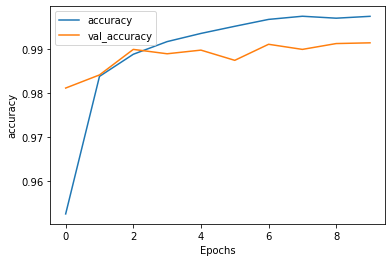

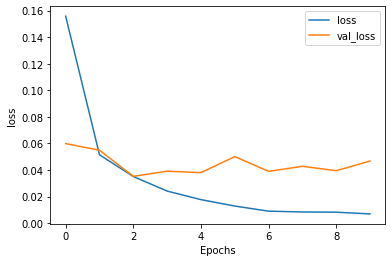

In [25]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Visualizing the effect of convolutions

In [26]:
for layer in model.layers:
    print(layer.output)

Tensor("conv2d/Identity:0", shape=(None, 26, 26, 64), dtype=float32)
Tensor("max_pooling2d/Identity:0", shape=(None, 13, 13, 64), dtype=float32)
Tensor("conv2d_1/Identity:0", shape=(None, 11, 11, 64), dtype=float32)
Tensor("max_pooling2d_1/Identity:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten/Identity:0", shape=(None, 1600), dtype=float32)
Tensor("dense_6/Identity:0", shape=(None, 128), dtype=float32)
Tensor("dense_7/Identity:0", shape=(None, 10), dtype=float32)


Image labels are: 7, 9, 7 respectively in rows


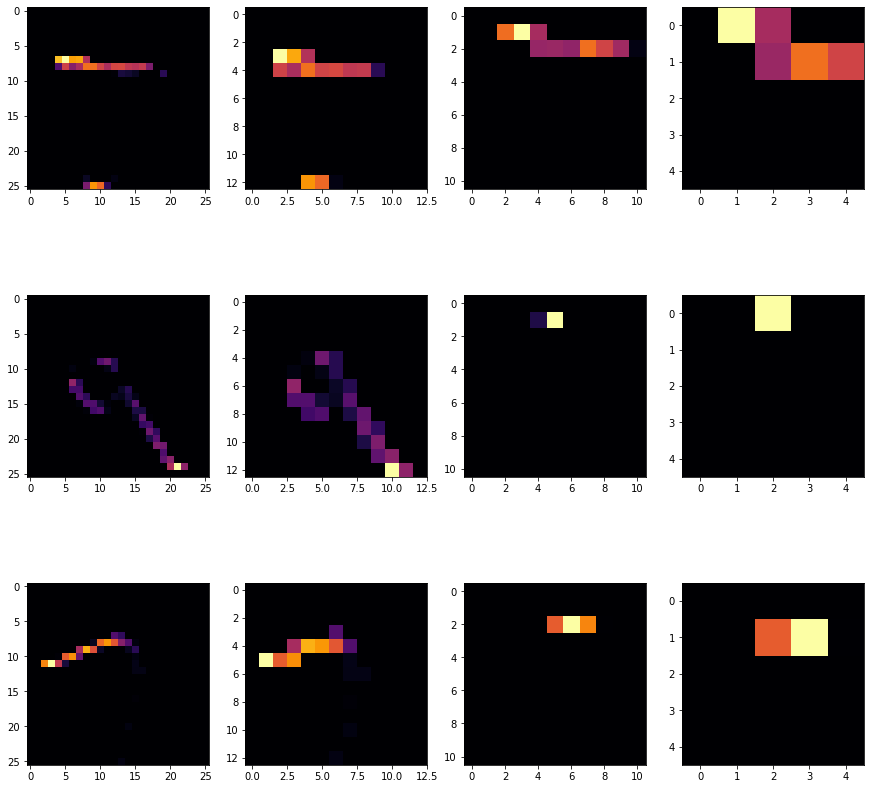

In [27]:
import matplotlib.pyplot as plt
test_images = x_test
f, axarr = plt.subplots(3,4, figsize=(15, 15))
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

print("Image labels are: {}, {}, {} respectively in rows".format(y_test[FIRST_IMAGE], y_test[SECOND_IMAGE], y_test[THIRD_IMAGE]))

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Thank You.